# Importing Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

2024-05-03 13:43:48.749489: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 13:43:48.749710: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 13:43:48.995181: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Data Pre-Processing

## Training Image Pre-Processing


In [2]:
training_set = keras.utils.image_dataset_from_directory(
    '/kaggle/input/fruit-and-vegetable-image-recognition/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
)

Found 3115 files belonging to 36 classes.


## Validtion Image Pre-Processing

In [3]:
validation_set = keras.utils.image_dataset_from_directory(
    '/kaggle/input/fruit-and-vegetable-image-recognition/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
)

Found 351 files belonging to 36 classes.


# Building Model

In [4]:
cnn = tf.keras.models.Sequential()

# Building Convulation layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [7]:
cnn.add(tf.keras.layers.Dropout(0.5)) #to avoid overfitting

In [8]:
cnn.add(tf.keras.layers.Flatten())

In [9]:
cnn.add(tf.keras.layers.Dense(units=128))

In [10]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax')) 

# Compiling and Training Phase 

In [12]:
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=30)


Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 78s 722ms/step - accuracy: 0.0278 - loss: 25.9167 - val_accuracy: 0.0598 - val_loss: 3.5325
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 602ms/step - accuracy: 0.0433 - loss: 5.0160 - val_accuracy: 0.0484 - val_loss: 5.5126
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 599ms/step - accuracy: 0.0706 - loss: 4.3413 - val_accuracy: 0.1652 - val_loss: 3.2771
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 598ms/step - accuracy: 0.1027 - loss: 3.6397 - val_accuracy: 0.2422 - val_loss: 2.9963
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 61s 587ms/step - accuracy: 0.1444 - loss: 3.6932 - val_accuracy: 0.0940 - val_loss: 7.3851
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 62s 590ms/step - accuracy: 0.1268 - loss: 4.2364 - val_accuracy: 0.0313 - val_loss: 3.5744
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 597ms/step - accuracy: 0.0320 - loss: 3.9912 - val_accuracy: 0.0285 - val_loss: 3.5846
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 598ms/step - accuracy: 0.0284 - loss: 3.5817 - val_acc

In [14]:
cnn.save('trained_model.h5')

In [15]:
training_history.history

{'accuracy': [0.031139647588133812,
  0.05232744663953781,
  0.08057785034179688,
  0.1120385229587555,
  0.15024076402187347,
  0.09052969515323639,
  0.03146067261695862,
  0.031139647588133812,
  0.031139647588133812,
  0.030497591942548752,
  0.031139647588133812,
  0.030818618834018707,
  0.02921348251402378,
  0.030818618834018707,
  0.028250401839613914,
  0.027608346194028854,
  0.02921348251402378,
  0.030818618834018707,
  0.02985553815960884,
  0.026966292411088943,
  0.028250401839613914,
  0.028250401839613914,
  0.02985553815960884,
  0.02985553815960884,
  0.03210273012518883,
  0.03210273012518883,
  0.03210273012518883,
  0.031139647588133812,
  0.030818618834018707,
  0.030497591942548752],
 'loss': [8.954855918884277,
  4.638155937194824,
  4.202223300933838,
  3.8636410236358643,
  3.856673002243042,
  4.461755752563477,
  3.8107500076293945,
  3.5814831256866455,
  3.580975294113159,
  4.236198425292969,
  3.5798561573028564,
  3.5797746181488037,
  3.5795285701751

In [16]:
#recording history
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

In [17]:
print(training_history.history.keys)

<built-in method keys of dict object at 0x7a5ea897c240>


# Calculating Accuracy of Model Achieved on Validation Set

In [18]:
print("Validation Set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation Set Accuracy: 2.849002927541733 %


# Visualization Of Accuracy 

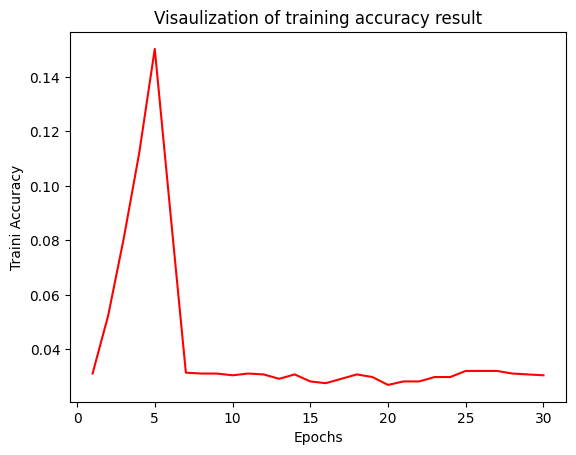

In [19]:
# training visualization
epochs =[i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('Epochs')
plt.ylabel('Traini Accuracy')
plt.title('Visaulization of training accuracy result')
plt.show()

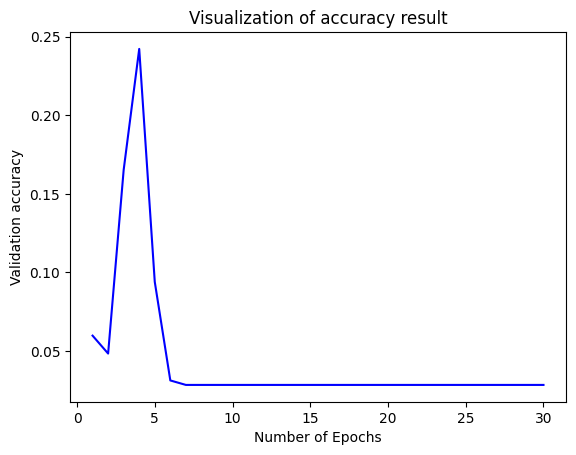

In [20]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('Number of Epochs')
plt.ylabel('Validation accuracy')
plt.title('Visualization of accuracy result')
plt.show()